In [2]:
!pip install opencv-contrib-python


  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/aa/2e/576ac47f21d555b459ca837bb3fb937e50339b8fbfd294945ea2f5290416/opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 MB 435.7 kB/s eta 0:01:44
   ---------------------------------------- 0.0/45.3 MB 326.8 kB/s eta 0:02:19
   ---------------------------------------- 0.1/45.3 MB 508.4 kB/s eta 0:01:29
   ---------------------------------------- 0.1/45.3 MB 525.1 kB/s eta 0:01:27
   ---------------------------------------- 0.1/45.3 MB 566.5 kB/s eta 0:01:20
   ---------------------------------------- 0.2/45.3 MB 614.4 kB/s eta 0:01:14
   ---------------------------------------- 0.2/45.3 MB 621.6 kB/s eta 0:01:13
   ---------------------------------------- 0.2/45.3 MB 597.3 kB/s eta

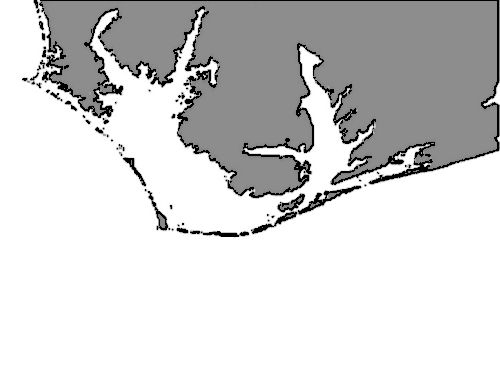

In [7]:
import sys
import random 
import itertools
import numpy as np
import cv2 as cv

MAP_FILE = 'C:/Users/Artem/Downloads/cape_python.png'
SA1_CORNERES = (130, 265, 180, 315) # (UL-X, UL-Y, LR-X, LR-Y)
SA2_CORNERES = (80, 255, 130, 305) # (UL-X, UL-Y, LR-X, LR-Y)
SA3_CORNERES = (105, 205, 155, 255) # (UL-X, UL-Y, LR-X, LR-Y)


In [10]:
import sys
import random
import itertools
import numpy as np
import cv2 as cv

MAP_FILE = 'cape_python.png'

# Assign search area (SA) corner point locations based on image pixels.
SA1_CORNERS = (130, 265, 180, 315)  # (UL-X, UL-Y, LR-X, LR-Y)
SA2_CORNERS = (80, 255, 130, 305)   # (UL-X, UL-Y, LR-X, LR-Y)
SA3_CORNERS = (105, 205, 155, 255)  # (UL-X, UL-Y, LR-X, LR-Y)


class Search():
    """Bayesian Search & Rescue game with 3 search areas."""

    def __init__(self, name):
        self.name = name
        self.img = cv.imread(MAP_FILE, cv.IMREAD_COLOR)
        if self.img is None:
            print('Could not load map file {}'.format(MAP_FILE),
                  file=sys.stderr)
            sys.exit(1)

        # Set placeholders for sailor's actual location
        self.area_actual = 0
        self.sailor_actual = [0, 0]  # As "local" coords within search area

        # Create numpy arrays for each search area by indexing image array.
        self.sa1 = self.img[SA1_CORNERS[1] : SA1_CORNERS[3],
                            SA1_CORNERS[0] : SA1_CORNERS[2]]

        self.sa2 = self.img[SA2_CORNERS[1] : SA2_CORNERS[3],
                            SA2_CORNERS[0] : SA2_CORNERS[2]]

        self.sa3 = self.img[SA3_CORNERS[1] : SA3_CORNERS[3], 
                            SA3_CORNERS[0] : SA3_CORNERS[2]]

        # Set initial per-area target probabilities for finding sailor
        self.p1 = 0.2
        self.p2 = 0.5
        self.p3 = 0.3

        # Initialize search effectiveness probabilities.
        self.sep1 = 0
        self.sep2 = 0
        self.sep3 = 0
class Search():
    """Байесовская игра "Поиск и спасение" с 3 областями поиска."""

    def __init__(self, name):
        self.name = name
        self.image = cv.imread(MAP_FILE, cv.IMREAD_COLOR)
        if self.img is None:
            print('Could not load map file {}'.format(MAP_FILE),
                  file=sys.stderr)  # красный цвет ошибки
            sys.exit(1)

    self.area = 0

    self.sailor_actual = [0, 0]  # "локальные" координаты в области поиска моряка

    self.sa1 = self.img[SA1_CORNERES[1]: SA1_CORNERES[3],
               SA1_CORNERES[0]: SA1_CORNERES[2]]

    self.sa2 = self.img[SA2_CORNERES[1]: SA2_CORNERES[3],
               SA2_CORNERES[0]: SA2_CORNERES[2]]

    self.sa3 = self.img[SA3_CORNERES[1]: SA3_CORNERES[3],
               SA3_CORNERES[0]: SA3_CORNERES[2]]

    self.p1 = 0.2
    self.p2 = 0.5
    self.p3 = 0.3

    self.sep1 = 0
    self.sep2 = 0
    self.sep3 = 0
    
    
    

In [ ]:
def draw_map(self, last_know):
    